<a href="https://colab.research.google.com/github/Poojithasingh07/Boston-Housing-Prediction-/blob/main/Boston%20Housing%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv('boston_housing.csv')

In [5]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


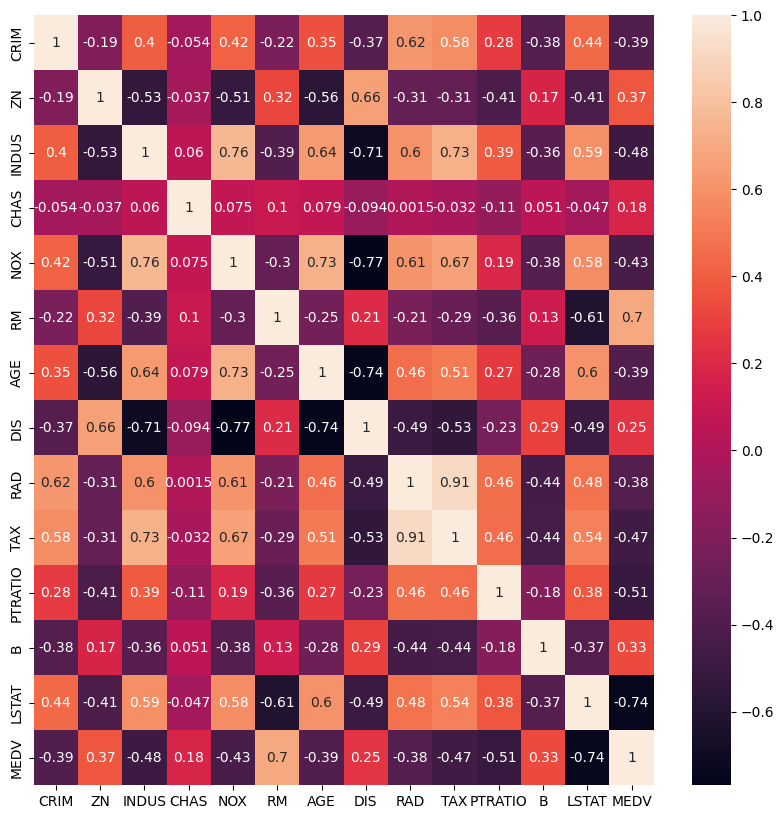

In [10]:
corr= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

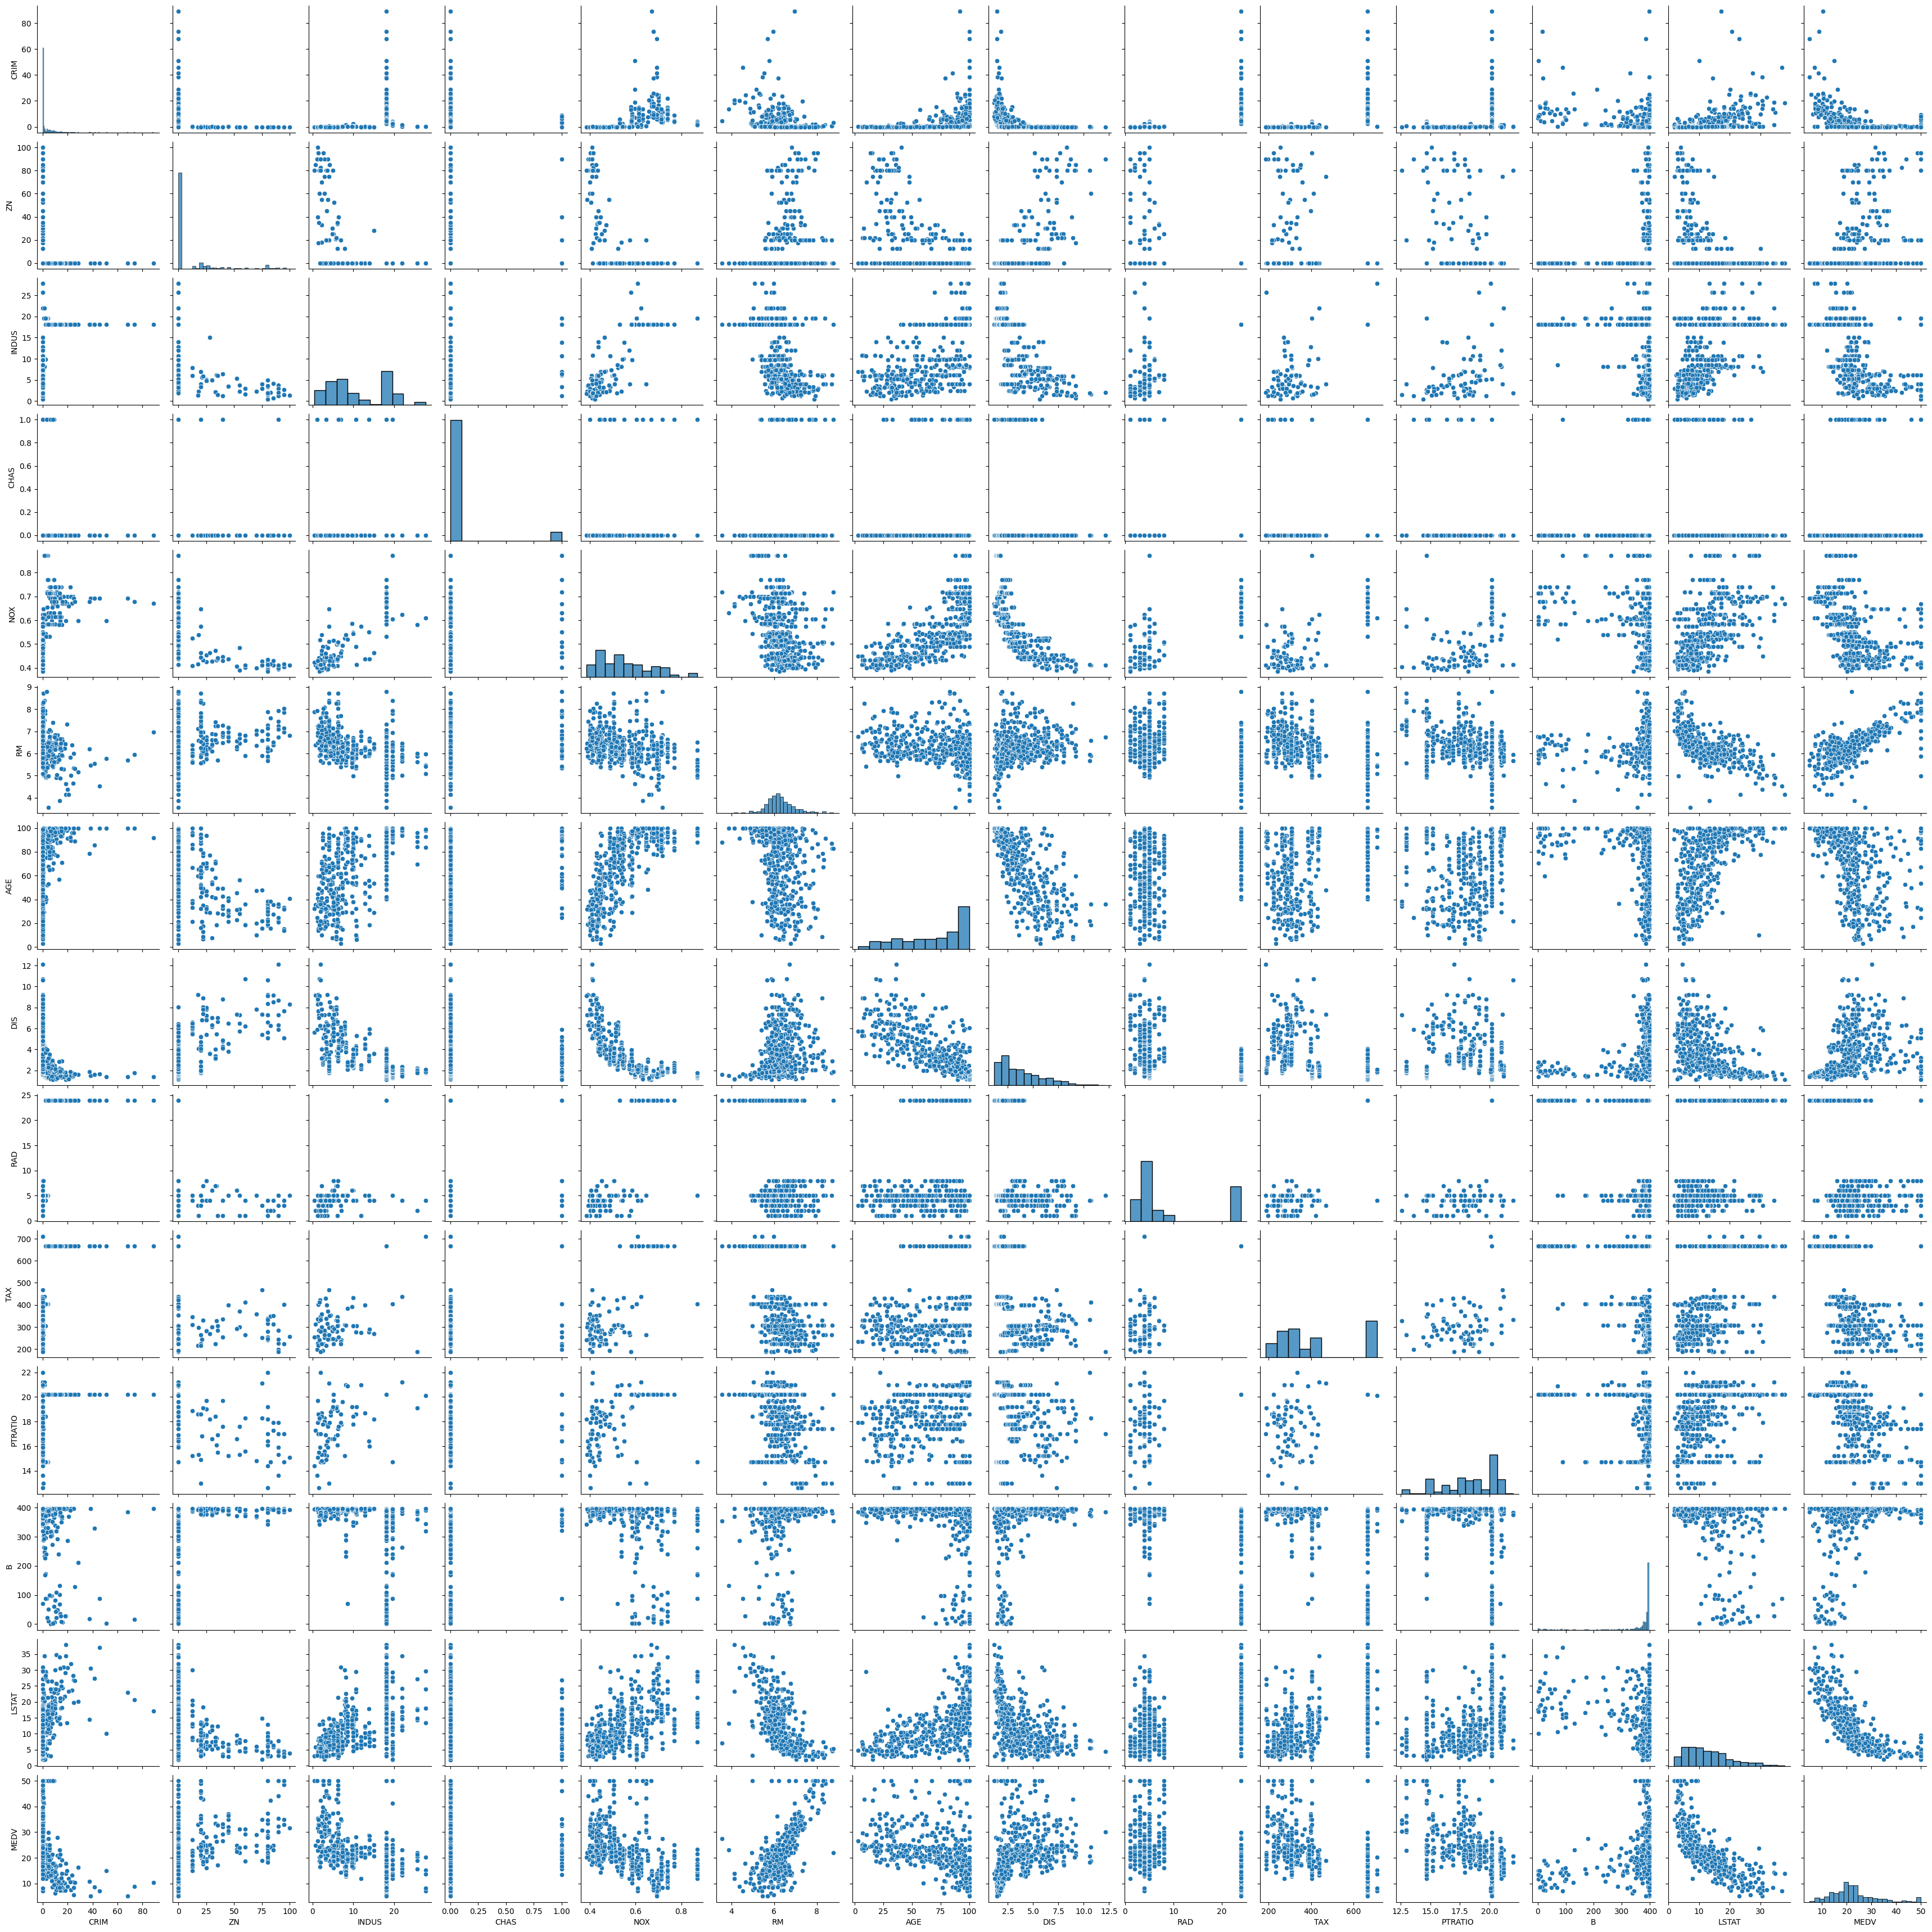

In [12]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

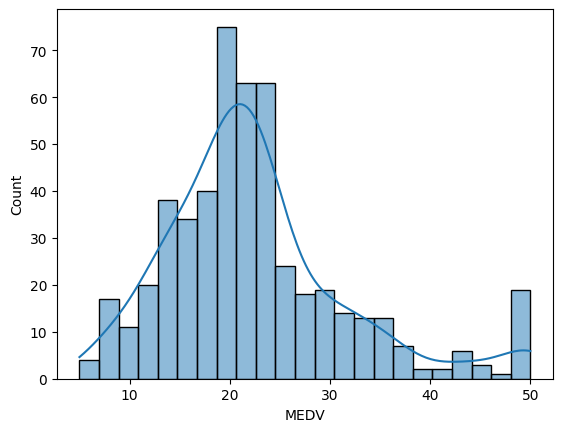

In [14]:
sns.histplot(df['MEDV'], kde=True)

<Axes: xlabel='RM', ylabel='MEDV'>

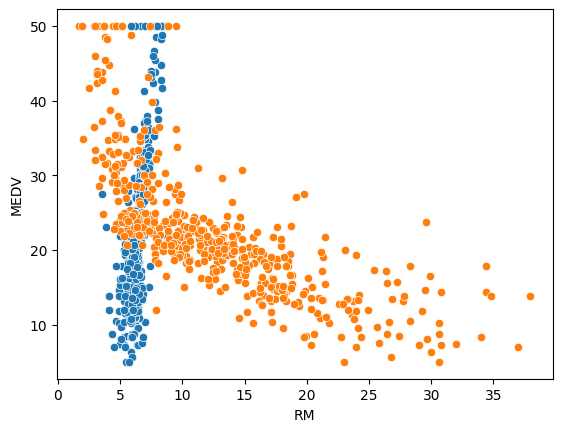

In [16]:
sns.scatterplot(x='RM', y='MEDV', data=df)   # Rooms vs Price
sns.scatterplot(x='LSTAT', y='MEDV', data=df) # Lower status vs Price

<Axes: xlabel='CHAS', ylabel='count'>

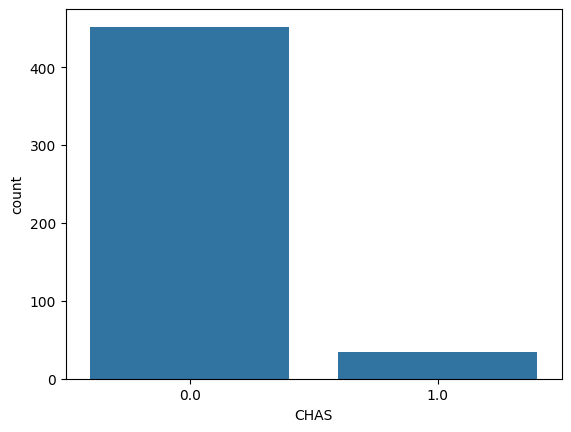

In [17]:
sns.countplot(x='CHAS', data=df)


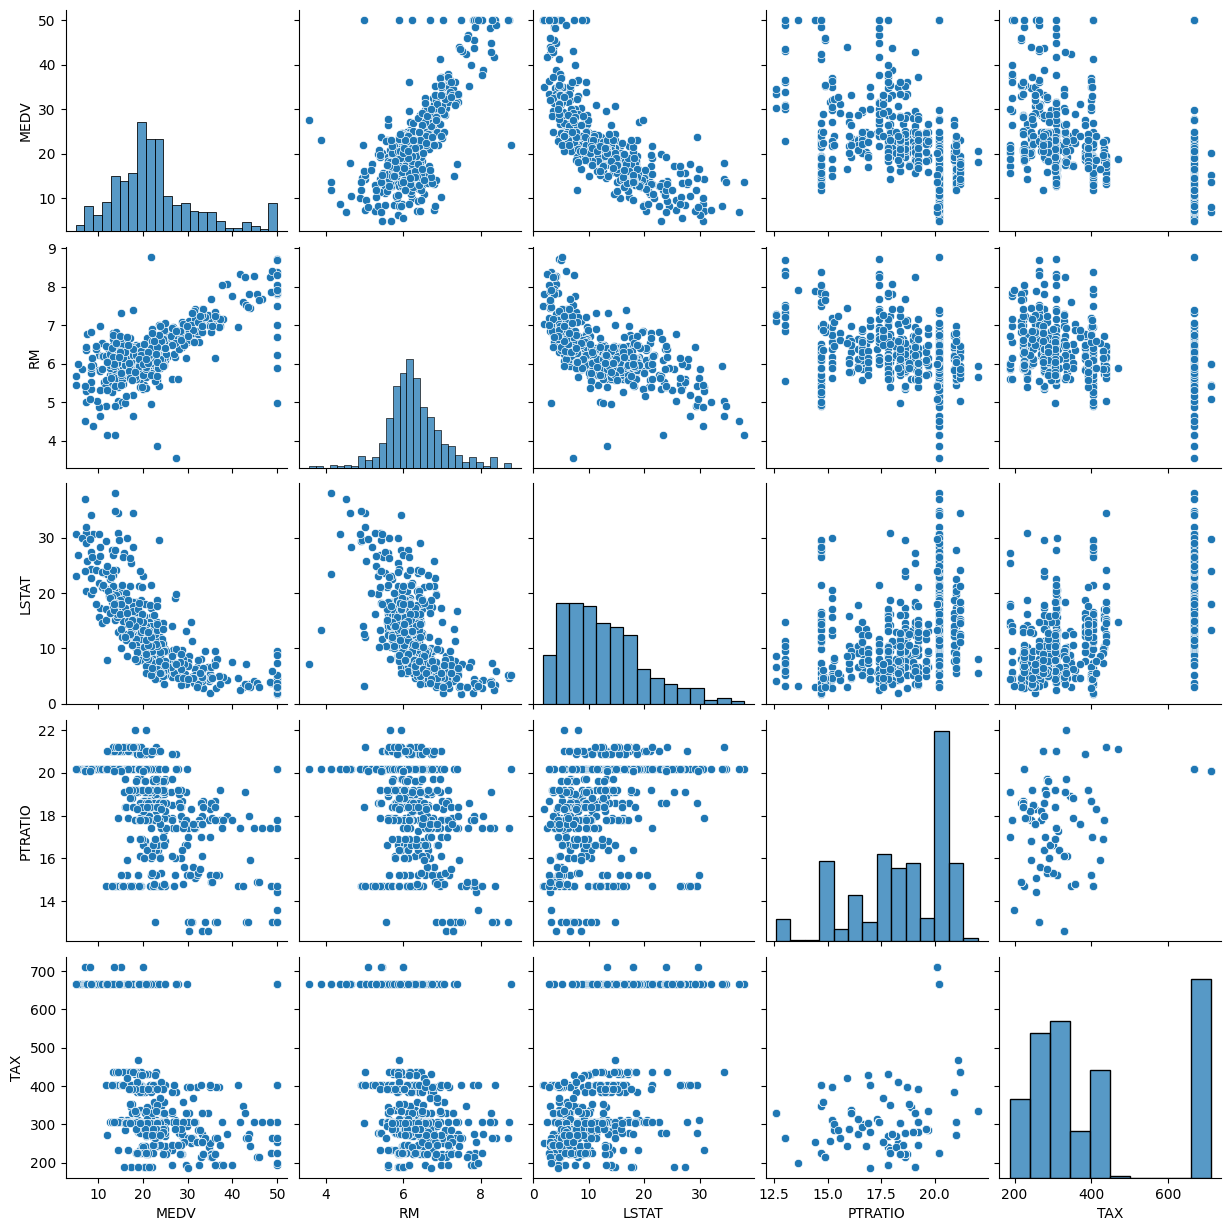

In [21]:
sns.pairplot(df[['MEDV', 'RM', 'LSTAT', 'PTRATIO', 'TAX']])


<Axes: xlabel='RM_LSTAT', ylabel='MEDV'>

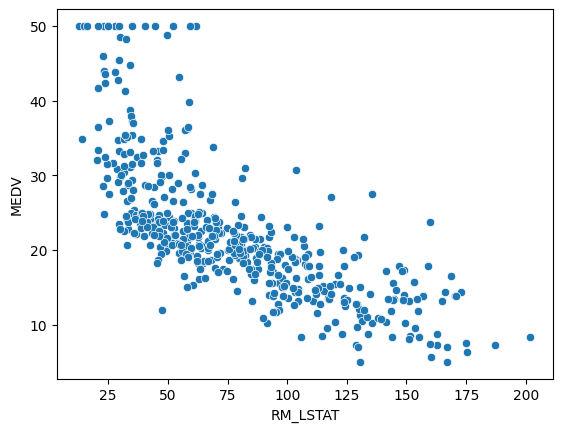

In [23]:
df['RM_LSTAT'] = df['RM'] * df['LSTAT']
sns.scatterplot(x='RM_LSTAT', y='MEDV', data=df)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
from re import X
from sklearn.preprocessing import StandardScaler
X = df.drop('MEDV', axis=1)
y = df['MEDV']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train , y_train

(array([[ 1.30998086, -0.47986431,  1.02740548, ..., -0.07887794,
          1.70589065,  1.44049568],
        [-0.34260246, -0.47986431, -0.43111028, ...,  0.42701755,
         -0.5938909 , -0.71060153],
        [-0.41064463,         nan, -0.73569992, ...,  0.06113692,
         -0.68342011, -0.76759184],
        ...,
        [-0.41290034,  2.94408951, -1.32877108, ...,  0.37570436,
         -0.94081659, -0.96210869],
        [ 0.86652956, -0.47986431,  1.02740548, ..., -2.70626713,
          1.47647206,  2.01616447],
        [-0.38836301, -0.47986431, -0.3696066 , ..., -3.13442533,
         -0.29172982, -0.2249994 ]]),
 477    2.484907
 15     2.990720
 332    2.965273
 423    2.595255
 19     2.901422
          ...   
 106    2.970414
 270    3.049273
 348    3.198673
 435    2.595255
 102    2.923162
 Name: MEDV, Length: 404, dtype: float64)

In [34]:
X_test, y_test

(array([[-0.40408756, -0.47986431,         nan, ...,  0.42570183,
         -0.51415395, -0.4872786 ],
        [-0.4081444 ,  1.2321126 , -0.68444685, ...,  0.44105193,
         -1.28494449, -1.37532344],
        [-0.40248503, -0.47986431,  2.43906129, ...,  0.36660394,
          0.74904723,  0.81604501],
        ...,
        [ 1.19832021, -0.47986431,  1.02740548, ..., -3.52640114,
          1.18969881,  1.67818134],
        [-0.40866786, -0.47986431, -0.96560652, ...,  0.43107437,
          0.02022352,  0.01603741],
        [-0.40370415, -0.47986431,  0.25568077, ...,  0.29116915,
         -0.52814289, -0.53419206]]),
 173    3.161247
 274    3.478158
 491    2.610070
 72     3.126761
 452    2.778819
          ...   
 412    2.884801
 436    2.261763
 411    2.844909
 86     3.113515
 75     3.063391
 Name: MEDV, Length: 102, dtype: float64)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train=scaler.fit_transform(X_train)


In [42]:
df_cleaned = df.dropna()


In [43]:
df_cleaned = df.dropna(axis=1)


In [44]:
threshold = 0.4
df_cleaned = df.dropna(axis=1, thresh=int((1-threshold)*len(df)))


In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

In [49]:
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
X, y = load_iris(return_X_y=True)
mask = np.random.randint(0, 2, size=X.shape).astype(bool)
X[mask] = np.nan
X_train, X_test, y_train, _ = train_test_split(X, y, test_size=100,
                                               random_state=0)

In [51]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean')  # or "median", "most_frequent", "constant"
X_imputed = imputer.fit_transform(X)


In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_imputed, y)


LinearRegression()

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipeline.fit(X, y)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [57]:
regression=LinearRegression()

In [61]:
regression.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [60]:
import pandas as pd
import numpy as np

print(np.isnan(X_train).sum(axis=0))   # count NaNs per column
print(np.isnan(X_train).sum())  # total NaNs

[24 30 31 26]
111


In [62]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

imputer = SimpleImputer(strategy="median")   # or "mean"
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed  = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train_imputed, y_train)


LinearRegression()

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # handle NaNs
    ("scaler", StandardScaler()),                    # scale features
    ("model", LinearRegression())                    # regression
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)



In [64]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)   # works even if X_train has NaNs


HistGradientBoostingRegressor()

In [65]:
reg_pred=model.predict(X_test)

In [68]:
print(X_train.shape)
print(X_test.shape)

(50, 4)
(100, 4)


In [70]:
print(y_train.shape)
print(y_test.shape)

(50,)
(102,)


In [71]:

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [72]:
input_data = tf.keras.layers.Input(shape=(13,))

In [73]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Mean Squared Error: 0.0321317821382329
R-squared: 0.793873545188529


In [84]:
import pickle

In [92]:
pickle.dump(regression, open('model.pkl', 'wb'))


In [93]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle

# 1. Scale training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 2. Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 3. Save both scaler & model
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [96]:
print(X_train.isnull().sum())   # shows missing values column-wise
print(X_train.isnull().values.any())  # True if there are NaNs


CRIM        18
ZN          17
INDUS       18
CHAS        16
NOX          0
RM           0
AGE         16
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT       15
RM_LSTAT    15
dtype: int64
True


In [97]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle

# 1. Impute NaN with median (you can also use "mean")
imputer = SimpleImputer(strategy="median")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed  = imputer.transform(X_test)

# 2. Scale training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled  = scaler.transform(X_test_imputed)

# 3. Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 4. Save scaler + model
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [98]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)

# Save the whole pipeline
with open("linreg_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)


In [99]:
loaded_pipeline = pickle.load(open("linreg_pipeline.pkl", "rb"))
y_pred = loaded_pipeline.predict(X_test)   # No NaN / scaling issues anymore



In [102]:
# Assuming you want to predict on the first sample of the original DataFrame
# First, ensure X_test is a DataFrame with the same columns as the training data
# X_test is already defined as a DataFrame with the correct columns from the Boston housing data.

# Use the loaded pipeline to make a prediction on the first sample of the test data
# The pipeline handles imputation and scaling internally.
# We need to select the first row and convert it to a numpy array with shape (1, -1) for prediction.

first_test_sample = X_test.iloc[[0]]  # Get the first row as a DataFrame

# Predict using the loaded pipeline
predicted_price = loaded_pipeline.predict(first_test_sample)

print(f"Predicted price for the first test sample: {predicted_price[0]}")

Predicted price for the first test sample: 3.304490855596101


In [104]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd

# Use the existing DataFrame 'df' loaded from the CSV
# X = pd.DataFrame(boston.data, columns=boston.feature_names) # Remove this line
X = df.drop('MEDV', axis=1) # Use the existing df
y = df['MEDV'] # Use the existing df

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: handles NaN, scaling, and regression
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

# Train
pipeline.fit(X_train, y_train)

# Save model as reg.pkl
with open("reg.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("✅ Model saved as reg.pkl")

✅ Model saved as reg.pkl


In [105]:
from google.colab import files
files.download("reg.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>